<a href="https://colab.research.google.com/github/romanozamoth/transfer-learning-ml-dio/blob/main/Transfer_Learning_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Transfer Learning - Gatos vs Cachorros

Bootcamp de Machine Learning - DIO

Neste notebook, aplicamos Transfer Learning com o modelo MobileNetV2 para classificar imagens de gatos e cachorros.

In [ ]:
# Importação de bibliotecas
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregando o dataset cats_vs_dogs
(train_ds, test_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

IMG_SIZE = 160

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

BATCH_SIZE = 32
train_batches = train_ds.map(format_image).shuffle(1000).batch(BATCH_SIZE)
test_batches = test_ds.map(format_image).batch(BATCH_SIZE)

In [ ]:
# Carregando o modelo MobileNetV2 pré-treinado
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

# Adicionando camadas finais para nosso problema
global_avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(global_avg)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
# Treinamento do modelo
EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=test_batches)

In [ ]:
# Avaliação simples
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Acurácia final no treino: {acc:.2f}, validação: {val_acc:.2f}")

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fazer upload de imagem
uploaded = files.upload()

for fn in uploaded.keys():
    # Abrir e redimensionar imagem
    img_path = fn
    img = Image.open(img_path).convert('RGB')
    img = img.resize((IMG_SIZE, IMG_SIZE))

    # Converter para array e normalizar
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 160, 160, 3)

    # Fazer predição
    prediction = model.predict(img_array)[0][0]

    # Interpretar resultado
    if prediction > 0.5:
        label = "Cachorro 🐶"
    else:
        label = "Gato 🐱"

    # Exibir resultado
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predição: {label} ({prediction:.2f})")
    plt.show()

# Teste feito no último bloco:
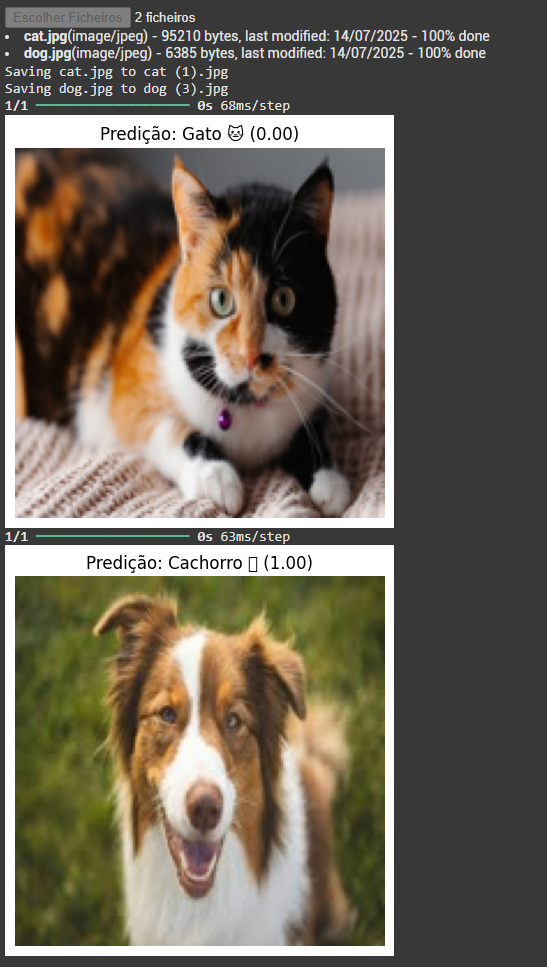


